Idea: approximate each row with sines or polynomials, and regress on their parameters

ie row(x) = a0 + a1x + a2x^2 + a3x^4 + a4x^5 etc

Maybe try fitting with Chebyshev (for sinusoidal) and Hermite polynomials (since they're used in signal processing)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import math
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.filters import sobel,laplace
from PIL import Image
from imageio import imwrite
%matplotlib inline

In [41]:
lena = np.asarray(Image.open('lena_gray.bmp'))

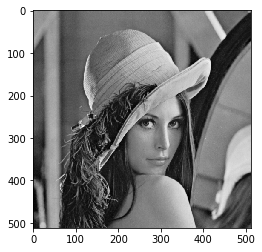

In [3]:
plt.imshow(lena, cmap = 'gray')

In [42]:
lena = lena / 255

In [5]:
from numpy.polynomial.polynomial import Polynomial as Poly
from numpy.polynomial.chebyshev import Chebyshev as Cheb
from numpy.polynomial.hermite_e import HermiteE as H


In [7]:
test = lena[0,:]

In [8]:
test

array([0.62745098, 0.62745098, 0.62745098, 0.62352941, 0.63137255,
       0.61176471, 0.63137255, 0.62352941, 0.63529412, 0.62352941,
       0.62745098, 0.61960784, 0.60392157, 0.63529412, 0.61960784,
       0.60392157, 0.61176471, 0.60784314, 0.62745098, 0.62745098,
       0.6       , 0.61176471, 0.60392157, 0.61176471, 0.60392157,
       0.61176471, 0.60392157, 0.59607843, 0.60784314, 0.6       ,
       0.6       , 0.60784314, 0.6       , 0.61568627, 0.60784314,
       0.61960784, 0.61568627, 0.64313725, 0.62745098, 0.64705882,
       0.65098039, 0.64705882, 0.64705882, 0.67058824, 0.66666667,
       0.68235294, 0.6745098 , 0.6627451 , 0.67058824, 0.67058824,
       0.65098039, 0.68235294, 0.65882353, 0.64705882, 0.63529412,
       0.62352941, 0.58431373, 0.58431373, 0.6       , 0.54901961,
       0.50980392, 0.47843137, 0.46666667, 0.41960784, 0.39607843,
       0.39215686, 0.37647059, 0.36862745, 0.36078431, 0.38431373,
       0.40392157, 0.38431373, 0.40784314, 0.4       , 0.41176

In [25]:
x = np.arange(512) / 511

In [26]:
x

array([0.        , 0.00195695, 0.00391389, 0.00587084, 0.00782779,
       0.00978474, 0.01174168, 0.01369863, 0.01565558, 0.01761252,
       0.01956947, 0.02152642, 0.02348337, 0.02544031, 0.02739726,
       0.02935421, 0.03131115, 0.0332681 , 0.03522505, 0.037182  ,
       0.03913894, 0.04109589, 0.04305284, 0.04500978, 0.04696673,
       0.04892368, 0.05088063, 0.05283757, 0.05479452, 0.05675147,
       0.05870841, 0.06066536, 0.06262231, 0.06457926, 0.0665362 ,
       0.06849315, 0.0704501 , 0.07240705, 0.07436399, 0.07632094,
       0.07827789, 0.08023483, 0.08219178, 0.08414873, 0.08610568,
       0.08806262, 0.09001957, 0.09197652, 0.09393346, 0.09589041,
       0.09784736, 0.09980431, 0.10176125, 0.1037182 , 0.10567515,
       0.10763209, 0.10958904, 0.11154599, 0.11350294, 0.11545988,
       0.11741683, 0.11937378, 0.12133072, 0.12328767, 0.12524462,
       0.12720157, 0.12915851, 0.13111546, 0.13307241, 0.13502935,
       0.1369863 , 0.13894325, 0.1409002 , 0.14285714, 0.14481

In [29]:
row = Poly.fit(x,test,100,domain=[0.0,1.0],window=[0.0,1.0])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1336: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


In [35]:
mse(row(x),test)

0.001187881138191918

In [36]:
rowH = H.fit(x,test,100,domain=[0.0,1.0],window=[0.0,1.0])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\polynomial\hermite_e.py:1371: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermevander, x, y, deg, rcond, full, w)


In [37]:
mse(rowH(x),test)

0.002638823493497963

In [38]:
rowCh = Cheb.fit(x,test,100,domain=[0.0,1.0],window=[0.0,1.0])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\polynomial\chebyshev.py:1647: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


In [39]:
mse(rowCh(x),test)

0.00017630512034743357

In [41]:
lenaP = np.empty((512,512))
lenaH = np.empty((512,512))
lenaCh = np.empty((512,512))
for i in range(0,512):
    lenaP[i] = Poly.fit(x,lena[i],100,domain=[0.0,1.0],window=[0.0,1.0])(x)
    lenaH[i] = H.fit(x,lena[i],100,domain=[0.0,1.0],window=[0.0,1.0])(x)
    lenaCh[i] = Cheb.fit(x,lena[i],100,domain=[0.0,1.0],window=[0.0,1.0])(x)

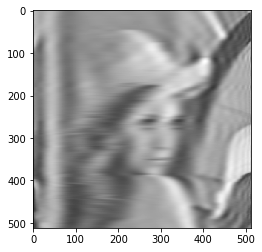

In [42]:
plt.imshow(lenaP, cmap = 'gray')

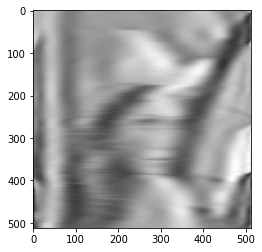

In [43]:
plt.imshow(lenaH, cmap = 'gray')

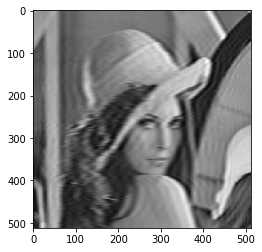

In [44]:
plt.imshow(lenaCh, cmap = 'gray')

In [45]:
lenaP2 = np.empty((512,512))
lenaH2 = np.empty((512,512))
lenaCh2 = np.empty((512,512))
for i in range(0,512):
    lenaP2[i] = Poly.fit(x,lena[i],256,domain=[0.0,1.0],window=[0.0,1.0])(x)
    lenaH2[i] = H.fit(x,lena[i],256,domain=[0.0,1.0],window=[0.0,1.0])(x)
    lenaCh2[i] = Cheb.fit(x,lena[i],256,domain=[0.0,1.0],window=[0.0,1.0])(x)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\polynomial\polyutils.py:706: RuntimeWarning: overflow encountered in square
  scl = np.sqrt(np.square(lhs).sum(1))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


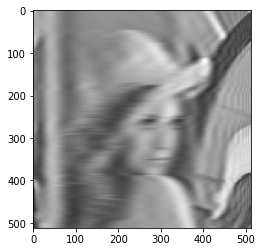

In [46]:
plt.imshow(lenaP2, cmap = 'gray')

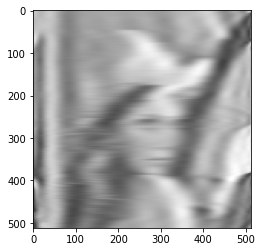

In [47]:
plt.imshow(lenaH2, cmap = 'gray')

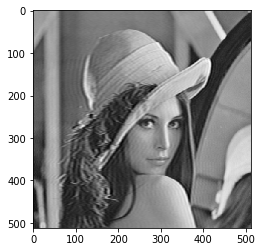

In [48]:
plt.imshow(lenaCh2, cmap = 'gray')

chebyshev clearly only viable

In [49]:
lenaCh350 = np.empty((512,512))
for i in range(0,512):
    lenaCh350[i] = Cheb.fit(x,lena[i],350,domain=[0.0,1.0],window=[0.0,1.0])(x)

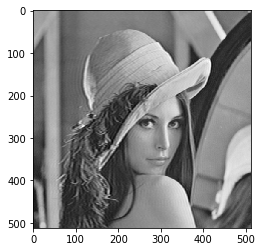

In [53]:
plt.imshow(lenaCh350, cmap = 'gray')


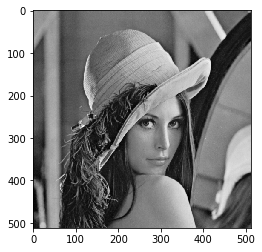

In [54]:
plt.imshow(lena, cmap = 'gray')

In [55]:
ssim(lena,lenaCh350)

0.9510187174776561

In [56]:
from imageio import imwrite

In [57]:
imwrite('lenaCh350.png', lenaCh350)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Noticable 'ripples' apparent in image, general poor fidelity

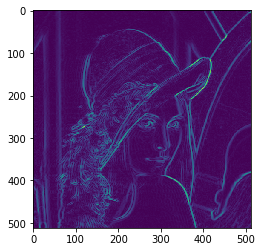

In [59]:
plt.imshow(sobel(lenaCh350))

### Try divisions instead of whole rows at a time

In [6]:
x = np.arange(16) / 15
x

array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
       1.        ])

In [10]:
lenaCh16s = np.empty((512,512))
for i in range(0,512):
    for j in range(0, 32):
        lenaCh16s[i,16*j:16*(j + 1)] = Cheb.fit(x,lena[i,16*j:16*(j + 1)],8,domain=[0.0,1.0],window=[0.0,1.0])(x)

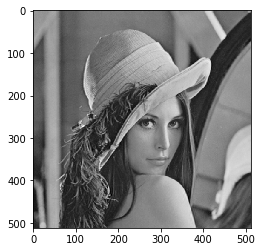

In [11]:
plt.imshow(lenaCh16s, cmap = 'gray')

In [12]:
print('ssim with base image: ' + str(ssim(lena,lenaCh16s)))
print('mse with base image: ' + str(mse(lena,lenaCh16s)))
print('PSNR: ' + str(psnr(lena,lenaCh16s)))

ssim with base image: 0.9845811369713257
mse with base image: 0.00016615556415385118
PSNR: 37.7948511065459


In [15]:
imwrite('lenaCh16s.png', lenaCh16s)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Notes: massive improvements visually - some small 'ripple' artifacts visible near boundaries on close inspection

##### Trying smaller divisions than 16

In [16]:
x = np.arange(8) / 7
x

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

In [17]:
lenaCh8s = np.empty((512,512))
for i in range(0,512):
    for j in range(0, 64):
        lenaCh8s[i,8*j:8*(j + 1)] = Cheb.fit(x,lena[i,8*j:8*(j + 1)],4,domain=[0.0,1.0],window=[0.0,1.0])(x)

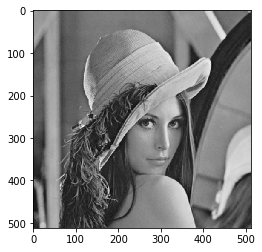

In [18]:
plt.imshow(lenaCh8s, cmap = 'gray')

In [19]:
print('ssim with base image: ' + str(ssim(lena,lenaCh8s)))
print('mse with base image: ' + str(mse(lena,lenaCh8s)))
print('PSNR: ' + str(psnr(lena,lenaCh8s)))

ssim with base image: 0.988601480957586
mse with base image: 0.00012351115293453331
PSNR: 39.08293824272902


In [20]:
imwrite('lenaCh8s.png', lenaCh8s)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Now no visible artifacts

#### Try adjusting domain and window to [-1,1]  as it is more natural for sinusoidal functions

In [35]:
lena = 2*(lena - 0.5)


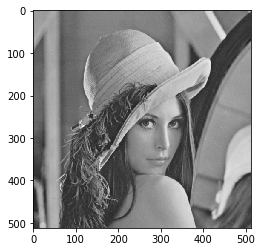

In [36]:
plt.imshow(test, cmap = 'gray', vmin=-1.0,vmax=1.0)

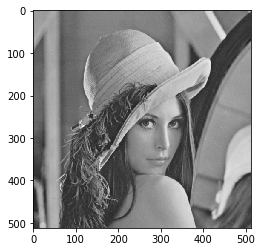

In [28]:
plt.imshow(lena, cmap = 'gray', vmin=-1.0,vmax=1.0)

In [29]:
x = 2*((np.arange(8) / 7) - 0.5)
x

array([-1.        , -0.71428571, -0.42857143, -0.14285714,  0.14285714,
        0.42857143,  0.71428571,  1.        ])

In [ ]:
lenaCh8s2 = np.empty((512,512))
for i in range(0,512):
    for j in range(0, 64):
        lenaCh8s2[i,8*j:8*(j + 1)] = Cheb.fit(x,lena[i,8*j:8*(j + 1)],4,domain=[-1.0,1.0],window=[-1.0,1.0])(x)

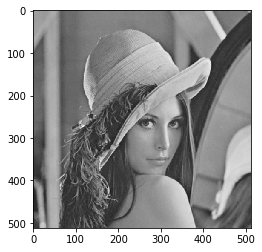

In [31]:
plt.imshow(lenaCh8s2, cmap = 'gray', vmin=-1.0,vmax=1.0)

In [32]:
print('ssim with base image: ' + str(ssim(lena,lenaCh8s2)))
print('mse with base image: ' + str(mse(lena,lenaCh8s2)))
print('PSNR: ' + str(psnr(lena,lenaCh8s2)))

ssim with base image: 0.9760550916483791
mse with base image: 0.0004940446117381334
PSNR: 39.08293824272902


note: slightly worse results for unknown reason

#### Trying lower number of parameters.

So this time, slices of size 8, each represented with chebyshev polynomial with 4 parameters for polynomials 0,1,2,3, values scaled 0-1

In [43]:
x = np.arange(8) / 7
x

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

In [44]:
lena = np.asarray(Image.open('lena_gray.bmp'))

In [45]:
lena = lena / 255

In [46]:
lenaCh8p3 = np.empty((512,512))
for i in range(0,512):
    for j in range(0, 64):
        lenaCh8p3[i,8*j:8*(j + 1)] = Cheb.fit(x,lena[i,8*j:8*(j + 1)],3,domain=[0.0,1.0],window=[0.0,1.0])(x)

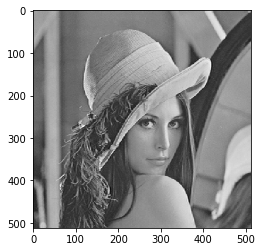

In [47]:
plt.imshow(lenaCh8p3, cmap = 'gray', vmin=0.0,vmax=1.0)

In [48]:
print('ssim with base image: ' + str(ssim(lena,lenaCh8p3)))
print('mse with base image: ' + str(mse(lena,lenaCh8p3)))
print('PSNR: ' + str(psnr(lena,lenaCh8p3)))

ssim with base image: 0.9796113830411691
mse with base image: 0.0002424963523298552
PSNR: 36.15294789741842


In [49]:
imwrite('lenaCh8p3.png', lenaCh8p3)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


#### Upon zooming in it's clear this method in general can cause vertical artifacts corresponding to the boundaries of slices, these artifacts seem to get worse with fewer parameters used. That said, these artifacts don't seem to be noticeable for standard viewing

Trying 3 parameters: for polynomials 0,1,2

In [50]:
lenaCh8p2 = np.empty((512,512))
for i in range(0,512):
    for j in range(0, 64):
        lenaCh8p2[i,8*j:8*(j + 1)] = Cheb.fit(x,lena[i,8*j:8*(j + 1)],2,domain=[0.0,1.0],window=[0.0,1.0])(x)

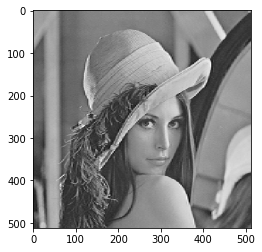

In [51]:
plt.imshow(lenaCh8p2, cmap = 'gray', vmin=0.0,vmax=1.0)

In [52]:
print('ssim with base image: ' + str(ssim(lena,lenaCh8p2)))
print('mse with base image: ' + str(mse(lena,lenaCh8p2)))
print('PSNR: ' + str(psnr(lena,lenaCh8p2)))

ssim with base image: 0.9628594619167601
mse with base image: 0.0004738878184577804
PSNR: 33.243244549312436


In [53]:
imwrite('lenaCh8p2.png', lenaCh8p2)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Note: Very noticeable vertical artifacts here

#### Comparison with dct

In [57]:
from scipy.fftpack import dct,idct

In [63]:
test = dct(lena[0,0:8],norm = 'ortho')

In [64]:
test

array([ 1.76915344e+00,  3.88512933e-03,  1.94026986e-03, -3.50086416e-03,
        2.77296777e-03,  1.28191682e-03, -9.80800215e-03,  1.18394305e-02])

In [65]:
idct(test, norm = 'ortho')

array([0.62745098, 0.62745098, 0.62745098, 0.62352941, 0.63137255,
       0.61176471, 0.63137255, 0.62352941])

In [66]:
test2 = test
test2[4:] = [0,0,0,0]

In [67]:
test2

array([ 1.76915344,  0.00388513,  0.00194027, -0.00350086,  0.        ,
        0.        ,  0.        ,  0.        ])

In [68]:
idct(test2, norm = 'ortho')

array([0.62683629, 0.62781813, 0.62791497, 0.62594537, 0.62324244,
       0.62232291, 0.62390477, 0.62593668])

In [69]:
lenaDCT = np.empty((512,512))
for i in range(0,512):
    for j in range(0, 64):
        quant = dct(lena[i,8*j:8*(j + 1)],norm='ortho')
        quant[4:] = [0,0,0,0]
        lenaDCT[i,8*j:8*(j + 1)] = idct(quant,norm='ortho')

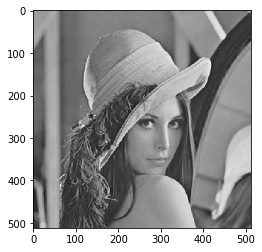

In [70]:
plt.imshow(lenaDCT, cmap = 'gray', vmin=0.0,vmax=1.0)

In [71]:
print('ssim with base image: ' + str(ssim(lena,lenaDCT)))
print('mse with base image: ' + str(mse(lena,lenaDCT)))
print('PSNR: ' + str(psnr(lena,lenaDCT)))

ssim with base image: 0.9821674568426387
mse with base image: 0.0002030900017668409
PSNR: 36.92311456626567


In [72]:
imwrite('lenaDCT.png', lenaDCT)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


similar artifacts with DCT